<a href="https://colab.research.google.com/github/Tkag0001/AI_and_Machine_Learning_for_Coders/blob/main/Chapter3_1_Going_Beyond_the_Basics_Detecting_Features_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3: Going Beyond the Basics: Detecting Features in Images
Hi, chào mọi người. Như trên tựa đề đã ghi, ở chương này, tụi mình sẽ đi xa hơn nữa, hơn cả mức cơ bản. Tìm hiểu sâu hơn với các khái niệm mới trong mạng thần kinh.

<img src="https://gregorygundersen.com/image/cnns/41847277995.png" alt="Description" style="width:30%;">

Chương này khá dài nên mình sẽ tổng quan trước những cái mới mà chúng mình sẽ học nha:

1. Cách sử dụng **phương pháp tích chập** để trích xuất các **đặc trưng** trong ảnh. Thông qua đó, ta hiểu được cách sử dụng các **lớp tích chập (Convolution layer)** để tăng hiệu quả học các bức ảnh. Thêm đó là phần **lớp gộp (Pooling layer)** giúp giảm thiểu số lượng tính toán, tuy nhiên vẫn giữ được các đặc trưng chính.
2. Phương pháp **gia tăng thêm dữ liệu (augmentation)** giúp làm giàu kho dữ liệu hơn, tăng dữ liệu trong quá trình huấn luyện giúp cải thiện mô hình.
3. Phương pháp **học chuyển giao (transfer learning)** giúp mô hình có thể tận dụng lại những kiến thức đã học được trước đó.
4. Ngoài ra, chúng mình cũng sẽ ôn lại về **phân loại đa lớp (multi-class classification)** cũng như tìm hiểu sơ qua về phương pháp **loại bỏ ngẫu nhiên (dropout)** giúp cải thiện mô hình, tránh được tình trạng **quá khớp (overfitting)**.

*Lưu ý: Khuyến khích mọi người sử dụng Colab, hãy chuyển sang T4 GPU ở chương này nha vì việc huấn luyện mô hình sử dụng các lớp tích chập tốn khá nhiều thời gian tính toán.*

#1. a) Chúng mình cùng tìm hiểu về phương pháp **"tích chập"** nha

Trước khi vào bài mới chúng mình cùng nhớ lại chút kiến thức ở chương trước ha.

Ở **chương 2** lần trước, tụi mình có cùng tìm hiểu về xây dựng một mô hình cơ bản để nhận diện đồ vật thông qua hình ảnh từ bộ dữ liệu **fashion_mnist** ha. Mô hình lần trước chỉ bao gồm các lớp tuyến tính cơ bản thôi, tụi mình tiến hành trải phẳng một bức ảnh từ 2D sang 1D tức là một mảng hay vector rồi đưa vào các lớp tuyến tính để học.

Kết quả thu được từ mô hình ở chương 2 khá là tốt rồi ha, trên 80%. Tuy nhiên chúng ta có thể thấy được phương pháp này có rất nhiều hạn chế từ việc phải trải phẳng hình ảnh ra, ở dữ liệu **fashion_mnist** thì chỉ đơn giản là ảnh trắng đen, tức một màu mà khi trải ra số lượng giá trị tuy cũng lớn nhưng mà kiến thức thu được chỉ ở dạng tổng quan hình ảnh mà chúng ta nhìn thấy. Nếu với ảnh màu tức 3 kênh màu (đỏ, xanh, lam) thì việc này sẽ khó khăn đến thế nào để có thể phân biệt được khi chúng ta chỉ nhìn từ một hướng hay một khía cạnh đặc trưng của chúng.

> *Liệu có một phương pháp nào đó để ta có thể phân tích sâu hơn các bức ảnh không? Như kiểu chia bức ảnh ra thành các đối tượng nhỏ hơn để có thể phân tích sâu hơn các khía cạnh.*

Câu trả lời là có. Chính là phương pháp tích chập mà ta tìm hiểu này.


Đi sâu vào toán quá thì sẽ khó hiểu, nên mọi người cứ nghĩ đơn giản vậy nha:  
> Phương pháp **tích chập** trong học máy là sử dụng các **bộ lọc (filters)** để nhìn hình ảnh dưới nhiều **góc độ và đặc điểm** khác nhau, từ đó mô hình có thể học được nhiều thông tin hơn.

Hmmm, vẫn khó hiểu nhỉ? Để mình lấy một ví dụ cụ thể cho dễ hình dung hơn nha.

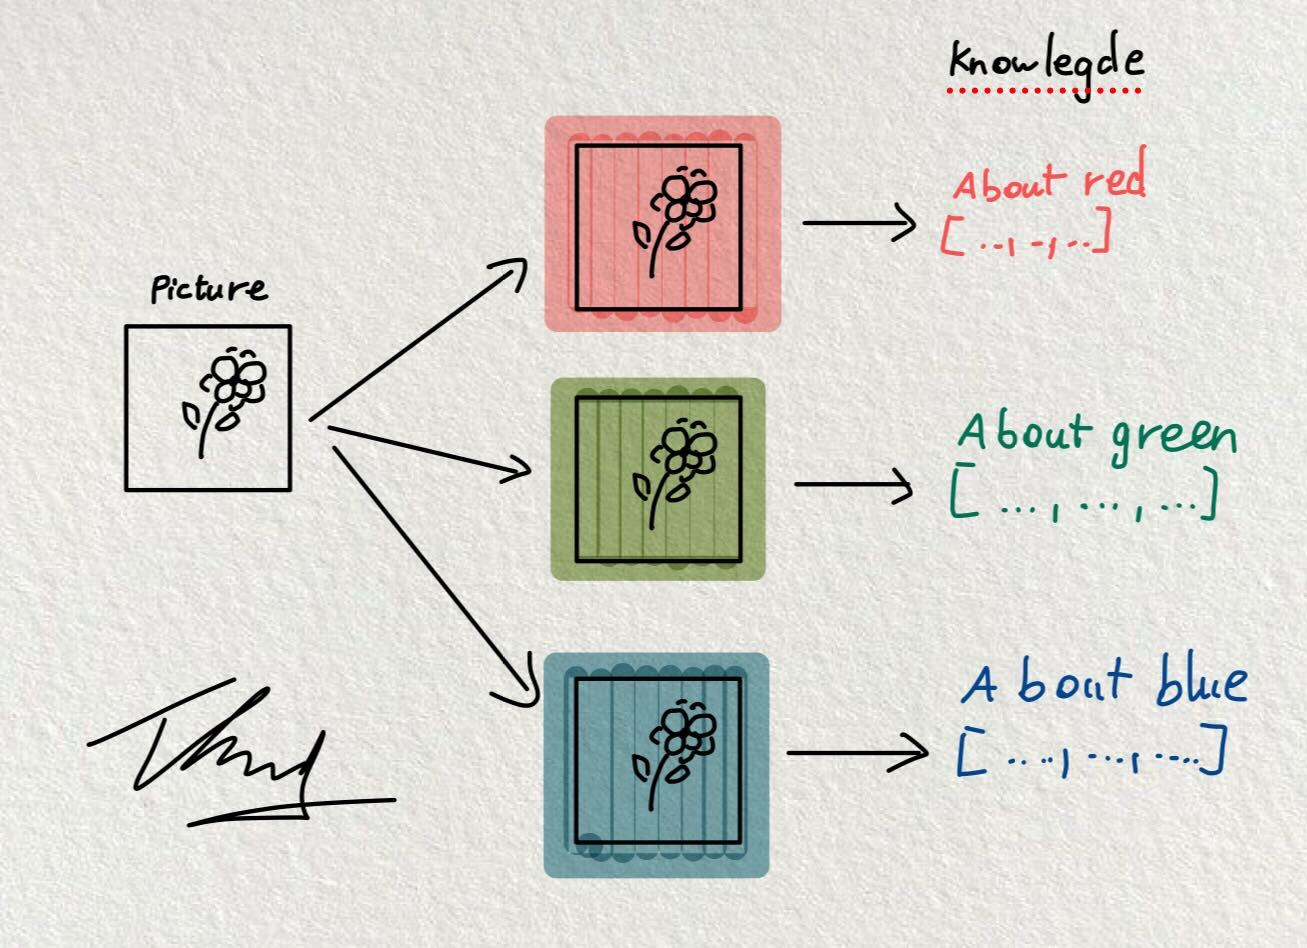

Ở đây mình có một bức ảnh và 3 miếng giấy bóng kính với 3 màu đỏ, xanh, lam. Thì khi mình chồng chúng lên bức ảnh để nhìn thi mình sẽ thấy được bức hình với các màu sắc khác nhau hơn từ đó thu được nhiều dữ liệu hơn.

> Ta có thể nói giấy bóng kính chính là các **bộ lọc** của **lớp tích chập**.

## Mình sẽ đi vào ví dụ về hình ảnh sau khi qua một lớp tích chập ha.

In [ ]:
# Tải bộ dữ liệu mnist
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
import numpy as np
import random

# Chọn ảnh mặc định
img = train_imgs[0]
print("Kích thước ảnh mặc định: ", img.shape)

# Chuẩn hóa ảnh
img = img / 255.0

# Chuyển về dạng array để đưa vào lớp cho dễ
img_arr = np.array(img)

# Ở đây chúng ta sẽ thực hiện một bước nhỏ để chỉ định lại kích thước ảnh,
# thêm số để chỉ định số lượng kênh màu, với ảnh trắng đen thì là 1
img_reshape = img.reshape(1, 28, 28, 1) # số 1 đầu tiên là số mẫu, số 1 ở cuối là số kênh màu

print("Kích thước ảnh sau khi được chuẩn hóa: ", img_reshape.shape)

Kích thước ảnh mặc định:  (28, 28)
Kích thước ảnh sau khi được chuẩn hóa:  (1, 28, 28, 1)


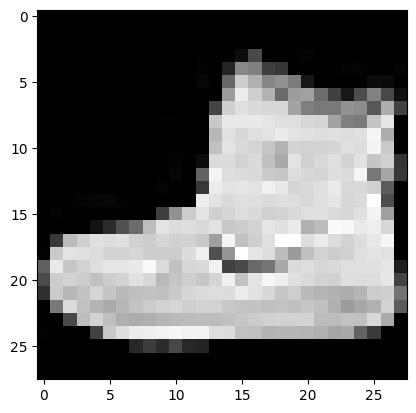

In [ ]:
# Xem ảnh mặc định
plt.imshow(img, cmap="gray")

In [ ]:
# Khởi tạo lớp convolution
conv_layer = tf.keras.layers.Conv2D(
    filters=8,            # Sử dụng 8 bộ lọc
    kernel_size=(3, 3)   # Kernel kích thước 3x3
)

# Xây dựng lớp Conv2D
conv_layer.build(img_reshape.shape)

In [ ]:
# Đưa ảnh qua lớp Convolution
output_images = conv_layer(img_reshape)

# Chuyển đổi đầu ra về dạng numpy
output_images_np = output_images.numpy().squeeze()  # Loại bỏ batch dimension

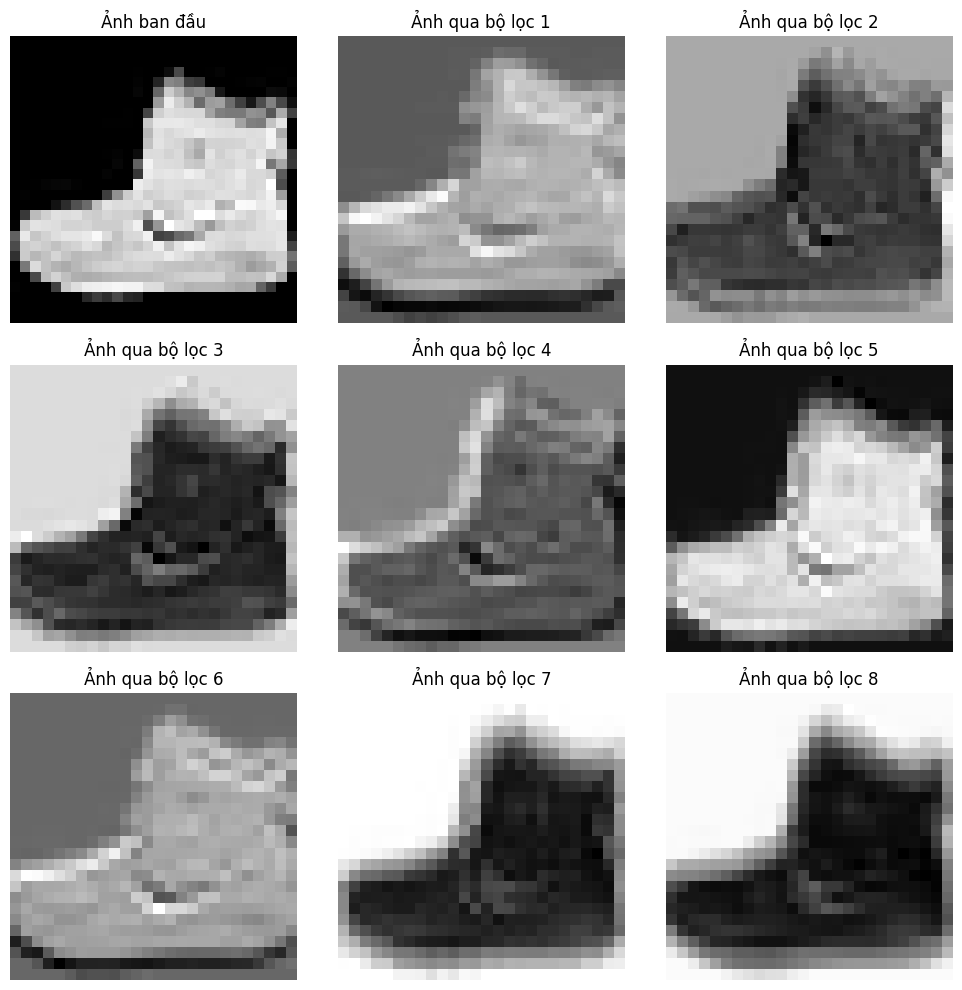

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axs = axs.flatten()

# Hiển thị ảnh gốc
axs[0].imshow(img, cmap="gray")
axs[0].axis("off")
axs[0].set_title("Ảnh ban đầu")

# Hiển thị ảnh đã qua lớp tích chập
for i in range(8):
    axs[i+1].imshow(output_images_np[..., i], cmap="gray")
    axs[i+1].axis("off")
    axs[i+1].set_title(f"Ảnh qua bộ lọc {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
print("Kích thước ảnh sau khi qua lớp tích chập: ", output_images_np[..., i].shape)

Kích thước ảnh sau khi qua lớp tích chập:  (26, 26)


Như mọi người thấy, bức ảnh sau khi qua lớp tích chập có 8 bộ lọc, sinh ra 8 bức ảnh khác nhau, từ đó mô hình có thể học được nhiều khía cạnh, đặc trưng khác nhau của hình ảnh ban đầu.

Mọi người tinh mắt có thể nhận thấy, kích thước đầu vào của ảnh là **(28 x 28)** nhưng sau khi qua **lớp tích chập** thì kích thước chỉ còn **(26 x 26)**. Điều này diễn ra là vì khi trải qua **bộ lọc (3 x 3)** thì phần viền hình ảnh sẽ thụt lùi vô để gộp với nhân của bộ lọc. Nói vậy khá khó hỉu nên mình sẽ lấy một hình ảnh làm ví dụ.

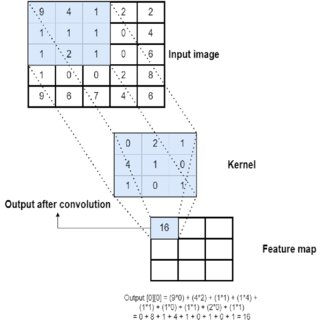

Sau khi phần **cửa sổ (3 x 3)** trượt trên hình ảnh gốc và cắt một phần ra, nhân với **bộ lọc (kernel 3 x 3)**, thì chúng tổng hợp lại còn 1 ô giá trị là 16, tương ứng với vị trí trung tâm (số 1) ở giữa của cửa sổ và bộ lọc. Do đó, phần viền ảnh bên trái, phải, trên, và dưới đều bị cắt đi.

Một ảnh có kích thước **A x B** sau khi qua lớp tích chập cơ bản thông thường sẽ có kích thước đầu ra là **(A-2) x (B-2)**.

> **Vậy có cách nào đảm bảo ảnh khi qua lớp tích chập có thể giữ nguyên kích thước không?**

Tất nhiên là có! Bạn chỉ cần thêm **padding** vào ảnh. Hiểu đơn giản, **padding** là số ô mà mình thêm vào phần viền xung quanh ảnh để mở rộng kích thước trước khi áp dụng bộ lọc. Như trong ví dụ minh họa, phần đệm (padding) thêm vào là 1 ô xung quanh ảnh.

![Image about padding.gift Nếu các bạn không thấy ảnh gift thì chắc medium bị chặn, các bạn có thể bật 1.1.1.1 lên nha](https://miro.medium.com/v2/resize:fit:640/format:webp/1*1okwhewf5KCtIPaFib4XaA.gif)

Phần màu xanh lam đại diện cho **ảnh gốc** kích thước 5 x 5.

Phần xám quét qua là **cửa sổ trượt** với kích thước 3 x 3. (Chú thích: cửa sổ trượt là phần sẽ quét qua tấm ảnh và nhân các giá trị trong đó với bộ lọc). Như trong hình, phần xám đó chính là nơi **áp bộ lọc (kernel)** lên.

Phần xanh lá chính là **ảnh đầu ra** sau khi đã qua bộ lọc.

Khi bộ lọc hay cửa sổ trượt quét qua ảnh đã được thêm **padding**, ô pixel trung tâm của bộ lọc có thể nhìn thấy được viền của ảnh gốc, từ đó giúp thu lại được phần viền của ảnh và giữ cho ảnh đầu ra có kích thước **tương đương với ảnh gốc**.

### Công thức thêm padding để giữ lại kích thước ảnh ban đầu:
> **padding = (kernel_size - 1) / 2**

Trong đó, **kernel_size** là kích thước bộ lọc.

*Lưu ý*: Kích thước của bộ lọc nên luôn là **số lẻ** (ví dụ: 3 x 3, 5 x 5,...). Điều này giúp dễ dàng hơn trong việc tính toán và định vị pixel trung tâm của bộ lọc.

---------------------------------------------------------------------------

Ngoài ra, **lớp tích chập** còn có thêm một tham số quan trọng nữa là **bước nhảy (stride)**. Bạn chỉ cần hiểu đơn giản, **bước nhảy** chính là **số ô mà cửa sổ trượt hay bộ lọc (kernel) nhích qua mỗi lần di chuyển**. Trong ví dụ trên, bước nhảy là **1**.

### Ứng dụng của tham số bước nhảy là gì?

Không phải lúc nào việc đi chậm như vậy hay để bước nhảy là 1 (mặc định) cũng tối ưu. Đối với các bức ảnh lớn, số lượng tính toán sẽ rất lớn, dẫn đến **tốn nhiều thời gian**. Hơn nữa, việc phân tích quá chi tiết một bức ảnh đôi khi sẽ **không học được các đặc trưng tổng quát** hoặc dẫn đến tình trạng **quá khớp (overfitting)**.

Lúc này, ta có thể tăng số lượng bước nhảy lên, ví dụ **2** hoặc lớn hơn. Điều này giúp bộ lọc di chuyển nhanh hơn và kích thước đầu ra giảm xuống.

### Tưởng tượng như sau:
- Nếu bạn bước đi từng nấc cầu thang (stride = 1), bạn cần **16 bước** để lên hết cầu thang.
- Nhưng nếu bạn bước cùng lúc **2 nấc** (stride = 2), bạn chỉ cần **8 bước**.

Tương tự, khi tăng **bước nhảy (stride)**, bộ lọc sẽ di chuyển nhanh hơn, giúp giảm kích thước đầu ra và **giảm thiểu thời gian** cũng như **lượng phép toán cần xử lý**.

Ví dụ, nếu áp dụng bước nhảy là **2**, kích thước ảnh đầu ra sẽ bị giảm đi một nửa so với khi sử dụng bước nhảy là **1**.

### Tổng kết lại những tham số bạn cần phải nhớ trong lớp tích chập:
1. **Kích thước bộ lọc (kernel size)**: Quy định kích thước của bộ lọc (ví dụ: 3x3, 5x5,...) dùng để trích xuất đặc trưng từ ảnh.
2. **Tham số về phần đệm (padding)**: Giúp bảo toàn kích thước ảnh đầu ra bằng cách thêm các giá trị vào viền ảnh gốc.
3. **Tham số về bước nhảy (stride)**: Quy định số ô mà cửa sổ trượt di chuyển mỗi lần, ảnh hưởng đến kích thước đầu ra và tốc độ tính toán.

### Các chỉ số có thể bạn sẽ muốn tìm hiểu thêm:
- **Độ giãn nở (dilation rate)**: Quy định khoảng cách giữa các phần tử trong bộ lọc, giúp mở rộng vùng nhận biết mà không làm tăng số lượng tham số.

# 1. b) Tiếp đến mình tìm hiểu về lớp gộp (pooling layer) ha.

**Lớp gộp (pooling layer)** có ý tưởng tương tự như lớp tích chập (convolution layer). Chúng cũng sử dụng một bộ lọc để quét qua hình ảnh và tổng hợp giá trị lại, cũng có kích thước bộ lọc và bước nhảy. Tuy nhiên, cách thức tổng hợp giá trị lại khác biệt:

- **Lớp tích chập (convolution layer)**: Nhân bộ lọc với phần được quét từ cửa sổ trượt trên ảnh để trích xuất đặc trưng.
- **Lớp gộp (pooling layer)**: Sử dụng các phép toán đơn giản như:
  - Tìm giá trị lớn nhất (**Max pooling**).
  - Tính trung bình các giá trị (**Average pooling**).

### Điểm khác biệt chính:
- **Lớp gộp (pooling layer)** không được coi là một lớp có khả năng học, vì mục tiêu của nó chỉ là tổng hợp giá trị, không sinh ra tham số học như lớp tích chập.
- Ngược lại, **lớp tích chập (convolution layer)** được coi là lớp có khả năng học, vì nó học các đặc trưng từ ảnh thông qua quá trình tối ưu hóa trọng số của bộ lọc.

### Lưu ý:
- **Bước nhảy (stride)** của lớp gộp thường được chọn bằng với kích thước cửa sổ quét của nó, điều này giúp giảm độ phức tạp tính toán một cách hiệu quả.

### Hai phương pháp gộp (pooling) phổ biến:
1. **Gộp theo giá trị lớn nhất (Max pooling)**: Chọn giá trị lớn nhất trong cửa sổ.
2. **Gộp theo trung bình cộng các giá trị (Average pooling)**: Tính trung bình các giá trị trong cửa sổ.

Để dễ hiểu hơn, mình sẽ thêm hai ví dụ minh họa bên dưới.

Gộp theo giá trị lớn nhất **(Max pooling)**.

![Max pooling](https://miro.medium.com/v2/resize:fit:1400/1*vOxthD0FpBR6fJcpPxq6Hg.gif)

Như các bạn thấy, phần **cửa sổ trượt** hay **bộ lọc màu đỏ** đã quét qua hình ảnh và lấy ra **giá trị lớn nhất** trong mỗi nhóm giá trị.

Từ đó, kích thước của tấm ảnh từ **4 x 4** đã giảm xuống còn **2 x 2** (với bước nhảy stride = 2).

Điều này minh họa cách **Max pooling** giúp giảm kích thước ảnh trong khi vẫn giữ lại các đặc trưng quan trọng nhất.

Bây giờ chúng ta đến với lớp gộp trung bình cộng **(Average pooling)**.
![Average pooling](https://raw.githubusercontent.com/valoxe/image-storage-1/master/blog-deep-learning/cnnumpy-naive/5-a.gif)

Về cách thức cũng không khác gì lớp gộp ở trên tuy nhiên thay vì tìm giá trị lớn nhất thì lại là tìm giá trị trung bình trong nhóm giá trị.

## Chúng mình sẽ đi vào quan sát rõ hơn hình ảnh sau khi qua lớp này.

In [ ]:
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

# Khởi tạo lớp gộp giá trị lớn nhất (Max pooling)
max_pool = MaxPooling2D(pool_size=(2, 2))
max_pool.build(img_reshape.shape)

# Cho ảnh qua lớp max pooling
img_max_pool = max_pool(img_reshape)
print("Kích thước ảnh sau khi qua lớp gộp giá trị lớn nhất: ",img_max_pool.shape)

# Khưởi tạo lớp gộp trung bình cộng (Average pooling)
avg_pool = AveragePooling2D(pool_size=(2, 2))
avg_pool.build(img_reshape.shape)

# Cho ảnh qua lớp gộp trung bình cộng
img_avg_pool = avg_pool(img_reshape)
print("Kích thước ảnh sau khi qua lớp gộp trung bình cộng: ",img_avg_pool.shape)

Kích thước ảnh sau khi qua lớp gộp giá trị lớn nhất:  (1, 14, 14, 1)
Kích thước ảnh sau khi qua lớp gộp trung bình cộng:  (1, 14, 14, 1)


Như mọi người thấy thì phần kích thước hình ảnh đã bị giảm đi một nửa (từ 28 chỉ còn 14). Bây giờ mình sẽ tiến hành hiển thị hình ảnh sau khi qua 2 lớp lên để quan sát ha.

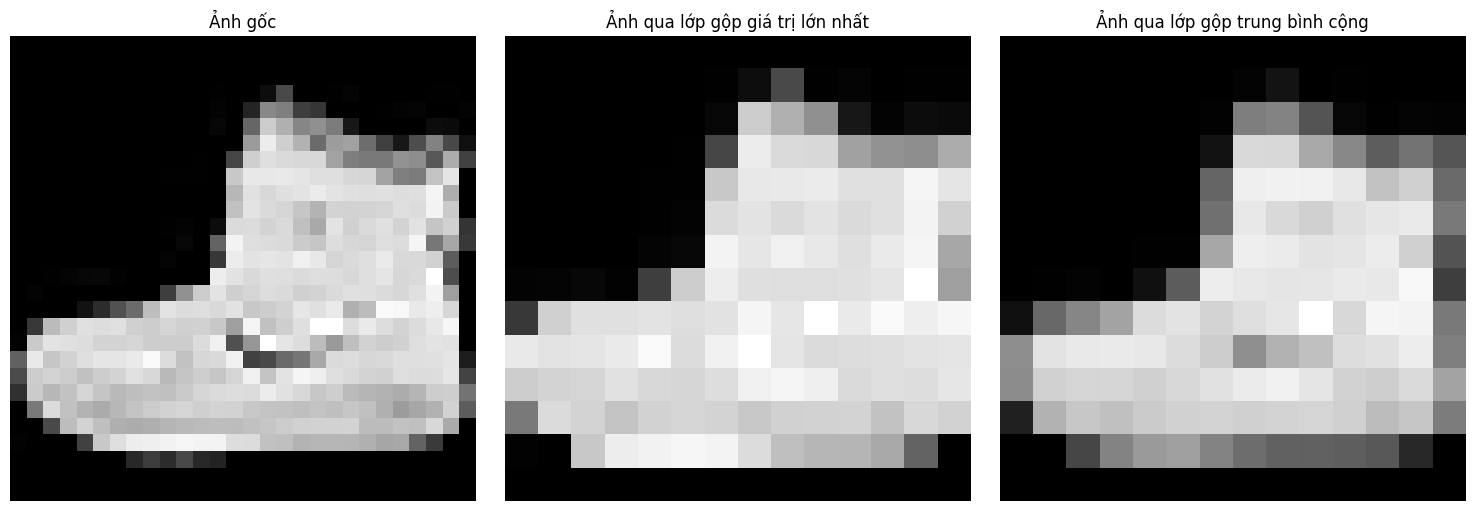

In [ ]:
# Chuyển đổi đầu ra về dạng numpy
# output_images_np = output_images.numpy().squeeze()  # Loại bỏ batch dimension
img_max_pool = img_max_pool.numpy().squeeze()
img_avg_pool = img_avg_pool.numpy().squeeze()

# Hiển thị hình ảnh
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Ảnh gốc
axs[0].imshow(img_reshape.squeeze(), cmap='gray')
axs[0].set_title('Ảnh gốc')
axs[0].axis('off')

# Ảnh qua lớp gộp giá trị lớn nhất (max pooling)
axs[1].imshow(img_max_pool, cmap='gray')
axs[1].set_title('Ảnh qua lớp gộp giá trị lớn nhất')
axs[1].axis('off')

# Ảnh qua lớp gộp trung bình cộng (average pooling
axs[2].imshow(img_avg_pool, cmap='gray')
axs[2].set_title('Ảnh qua lớp gộp trung bình cộng')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Như mọi người thấy, số lượng chi tiết trên hình ảnh sau khi qua **lớp gộp** đã bị giảm đi khá nhiều, do việc gộp các ô làm giảm kích thước ảnh.

Tuy nhiên, với mỗi **phương pháp gộp** (Max pooling hay Average pooling), kết quả sẽ khác nhau. Vì vậy, mọi người có thể linh hoạt sử dụng từng phương pháp trong từng trường hợp cụ thể, so sánh kết quả và lựa chọn cách phù hợp nhất với bài toán đang giải quyết.

## Tổng kết lại về lớp gộp (pooling layer):

- **Không phải là một lớp có khả năng học**: Không có tham số học, chỉ thực hiện tổng hợp giá trị.
- **Mục tiêu**: Giảm số lượng tính toán bằng cách giảm kích thước đầu ra, nhưng vẫn giữ lại các đặc trưng quan trọng của hình ảnh.
- **Các lớp gộp phổ biến**:
  - **Max pooling**: Lấy giá trị lớn nhất trong cửa sổ.
  - **Average pooling**: Tính trung bình giá trị trong cửa sổ.

Ngoài ra, mọi người cũng có thể tìm hiểu thêm các phương pháp gộp khác như:
- **Min pooling**: Lấy giá trị nhỏ nhất.
- **Global pooling**: Tính toán trên toàn bộ ảnh (thường dùng trong global average pooling hay global max pooling).
- **Mixed pooling**: Kết hợp cả max pooling và average pooling.

# 1. c) Chúng mình cùng bắt tay vào việc xây dựng cũng như phân tích một mô hình sử dụng các lớp tích chập (convolution) ha.
Ở đây mình vẫn sẽ sử dụng bài toán phân loại đồ đạc dựa trên bộ dữ liệu **fashion mnist** nha.

In [ ]:
# Kiểm tra kích thước tập dữ liệu huấn luyện (train) và tập dữ liệu kiểm tra (test)
print("Kích thước tập dữ liệu huấn luyện (train): ",train_imgs.shape)
print("Kích thước tập dữ liệu kiểm tra (test): ",test_imgs.shape)

Kích thước tập dữ liệu huấn luyện (train):  (60000, 28, 28)
Kích thước tập dữ liệu kiểm tra (test):  (10000, 28, 28)


Ta thấy được rằng tập huấn luyện có tổng cộng 60000 ảnh với kích thước ảnh là 28 x 28. Tập kiểm tra có 10000 ảnh với kích thước ảnh tương tự. Bây giờ chúng ta sẽ tiến hành định dạng lại kích thước các tập.

In [ ]:
# Vì bộ dữ liệu của chúng ta hiện tại chỉ đơn giản có kích thước là (số lượng mẫu x chiều cao x chiều rộng)
# Chúng chưa có kích thước về số kênh màu của ảnh nên chúng ta cần định dạng lại.
# Với ảnh trắng đen thì số kênh màu là 1 còn ảnh màu RGB thì sẽ là 3.
train_imgs = train_imgs.reshape(60000, 28, 28, 1)
test_imgs = test_imgs.reshape(10000, 28, 28, 1)

print("Kích thước tập dữ liệu huấn luyện (train) sau khi định dạng: ", train_imgs.shape)
print("Kích thước tập dữ liệu kiểm tra (test) sau khi định dạng: ", test_imgs.shape)

Kích thước tập dữ liệu huấn luyện (train) sau khi định dạng:  (60000, 28, 28, 1)
Kích thước tập dữ liệu kiểm tra (test) sau khi định dạng:  (10000, 28, 28, 1)


In [ ]:
# Ta tiến hành chuẩn hóa lại các giá trị ảnh như lần trước.
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Khởi tạo kiến trúc mô hình sử dụng các lớp tích chập (convolution)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Lớp tích chập với 64 bộ lọc kích thước 3 x 3
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Định nghĩa hàm tối ưu và hàm mất mát
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Huấn luyện mô hình, thời gian huấn luyện của mô hình này sẽ lâu hơn rất nhiều so với mô hình trước đó
# bởi số lượng tham số sinh ra từ các bộ lọc của lớp tích chập đã rất lớn
model.fit(train_imgs, train_labels, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7813 - loss: 0.6078
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8883 - loss: 0.3052
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9053 - loss: 0.2556
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9159 - loss: 0.2230
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9267 - loss: 0.1953
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9383 - loss: 0.1660
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9434 - loss: 0.1512
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9497 - loss: 0.1309
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9565 - loss: 0.1143
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9620 - loss: 0.1018
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.0903
Epoch 12/50
1875/1875 ━━━━━

Như mọi người có thể thấy thì mô hình ngay từ epoch 27, 28 đã có thể đạt được độ chính xác trên tập huấn luyện lên đến hơn 99%. Đây thật sự là một con số vô cùng ấn tượng so với mô hình chỉ dựa vào các lớp tuyến tính trước đó.

In [ ]:
# Đánh giá mô hình
eval = model.evaluate(test_imgs, test_labels)
print("Độ mất mát trên tập kiểm tra: ", eval[0])
print("Độ chính xác trên tập kiểm tra: ", eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - loss: 0.9777
Độ mất mát trên tập kiểm tra:  0.9211645722389221
Độ chính xác trên tập kiểm tra:  0.9115999937057495


Độ chính xác trên tập kiểm tra cũng đã có thể đạt được trên 90%, cao hơn rất là nhiều.

In [ ]:
# Tiến hành dự đoán hình ảnh trên tập kiểm tra.
predicted_label = model.predict(np.array([test_imgs[0]]))
print("Nhãn dự đoán: ", np.argmax(predicted_label))
print("Nhãn thực tế: ", test_labels[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Nhãn dự đoán:  9
Nhãn thực tế:  9


Để phân tích rõ hơn về đầu ra giữa các lớp trong mô hình mọi người có thể in ra bảng thống kê của mô hình như sau.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,360 (2.79 MB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,574 (1.86 MB)

Trong bảng trên, **Param** đại diện cho số lượng tham số học được trong các lớp, tức là số lượng phép tính toán phải thực hiện. Con số này càng lớn có thể cho thấy mô hình càng sâu và phức tạp. Tuy nhiên, điều này không đảm bảo rằng mô hình sẽ tốt hơn.

Mọi người có thể thấy, như mình từng nói, **lớp gộp (pooling)** chỉ có tác dụng tổng hợp và giữ lại các đặc trưng quan trọng, vì vậy **không có tham số học**. Ngược lại, các lớp như **tích chập (convolution)** hay **tuyến tính (dense)** có tham số học, vì trong quá trình huấn luyện, chúng được cập nhật trọng số và bộ lọc, do đó có khả năng học tập.

> Về công thức hay cách tính toán số lượng tham số, mình sẽ để các bạn tự tìm hiểu thêm nếu có nhu cầu. Phần này mình sẽ không đi sâu vào chi tiết toán học.

---

### Phân tích kích thước đầu ra giữa các lớp:

1. **Kích thước ban đầu**: Ảnh của chúng ta có kích thước **28 x 28**.

2. **Qua lớp tích chập đầu tiên**: Nếu không thêm padding, kích thước bị trừ đi phần viền do kernel size, còn lại **26 x 26**.

3. **Qua lớp gộp đầu tiên (2 x 2)**: Kích thước ảnh giảm đi một nửa, còn lại **13 x 13**.

4. **Qua lớp tích chập và lớp gộp thứ hai**:
   - Sau lớp tích chập thứ hai: Kích thước giảm xuống **11 x 11** (nếu không thêm padding).
   - Sau lớp gộp thứ hai (2 x 2): Kích thước giảm tiếp, còn **5 x 5**.

  > **Với trường hợp kích thước ảnh là số lẻ mà lớp gộp là số chẵn, lớp gộp giải quyết thế nào?**

  Câu trả lời là: **Lớp gộp sẽ bỏ đi hàng và cột cuối** để phù hợp với kích thước của cửa sổ gộp, do đó kết quả cuối cùng là **10 / 2 = 5**.

5. **Trải phẳng dữ liệu**:
   - Ở bước cuối, ta có ảnh kích thước **5 x 5**, và do có **64 bộ lọc**, tổng lượng dữ liệu là **5 x 5 x 64 = 1600**.
   - So với cách trải phẳng thông thường (28 x 28 = 784 dữ liệu), lượng dữ liệu được trích xuất để học tập, phân biệt đã tăng đáng kể.

---

### Kết luận:
Từ một bức ảnh ban đầu kích thước **28 x 28**, ta thu được **1600 dữ liệu** để đưa vào lớp tuyến tính thay vì chỉ có **784 dữ liệu** khi trải phẳng thông thường. Điều này giúp lượng dữ liệu học tập tăng lên đáng kể, cải thiện khả năng học đặc trưng và hiệu quả của mô hình.

# 1.c) Vẫn là mô hình với các lớp tích chập (convolution layer) nhưng trên bộ dữ liệu khác.
Ở đây tụi mình sẽ làm một bài toán mới là phân loại người và ngựa (về cơ bản vẫn là dạng bài toán phân loại nhị phân tức phân loại 2 đối tượng) dựa trên bộ dữ liệu [**horse-or-human**](https://www.tensorflow.org/datasets/catalog/horses_or_humans) download từ **google api**.

Thông thường, các bộ dữ liệu thường được định dạng dưới dạng **danh sách dữ liệu** và **danh sách nhãn đi kèm**. Tuy nhiên, trong một số trường hợp, dữ liệu lại được chia theo cách **lưu trong các folder**, với tên của **folder chính là nhãn** tương ứng. Ví dụ như trường hợp này vậy.

Để xử lý kiểu dữ liệu này một cách thuận tiện, chúng ta sẽ làm quen với phương thức **ImageDataGenerator** từ **Keras**. Công cụ này giúp **tái cấu trúc dữ liệu** và **tiền xử lý** hình ảnh một cách dễ dàng hơn, đồng thời hỗ trợ các thao tác như tăng cường dữ liệu (augmentation), chuẩn hóa (normalization), và tạo batch để huấn luyện mô hình.

In [ ]:
import urllib.request
import zipfile

# Link để download bộ dữ liệu huấn luyện horse-or-human
url = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"

file_name = "horse-or-human.zip"
training_dir = "horse-or-human/training/"
urllib.request.urlretrieve(url, file_name)

# Giải nén file zip
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

Sau khi chaỵ xong phần thư mục bên trái của bạn sẽ xuất hiện thêm các folder này.

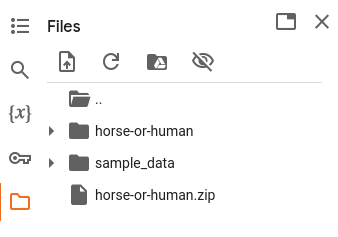

Mọi người có thể ấn vào để xem thử cấu trúc bên trong nha. Chúng sẽ có dạng cây thư mục như mình có đề cập ở trên với nhãn "horses" và các ảnh bên trong đó.

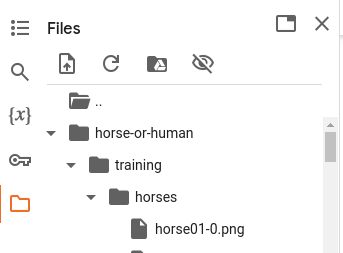

Bây giờ tụi mình sẽ sử dụng **ImageDataGenerator** để có thể load dữ liệu ha.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Thiết lập bước chuẩn hóa dữ liệu
train_datagen = ImageDataGenerator(rescale = 1./255)

# Chỉ định kích thước ảnh mong muốn cũng như loại bài toán (ở đây là bài toán phân loại nhị phân nha)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


Text(0.5, 1.0, 'Kích thước ảnh: (300, 300, 3)')

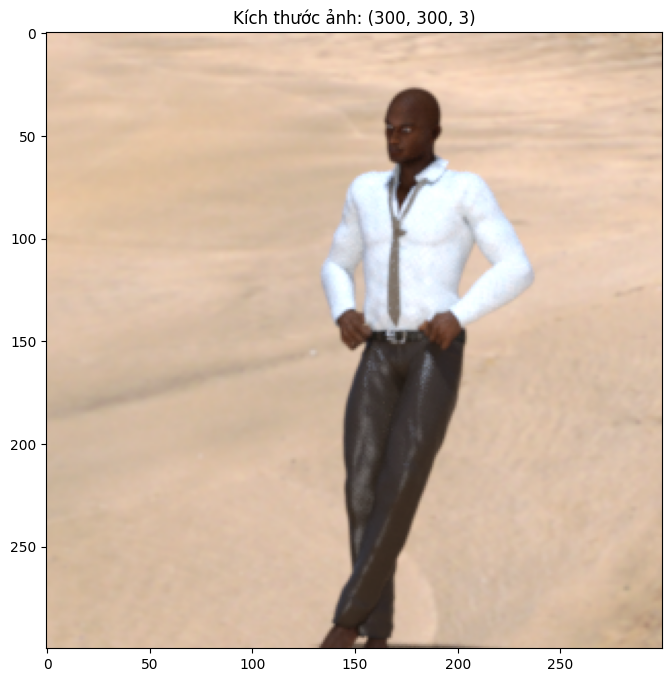

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Xem kích thước ảnh đầu ra cũng như hình ảnh đầu tiên
fig = plt.figure(figsize = (8,8))
plt.imshow(train_generator[0][0][0])
plt.title(f"Kích thước ảnh: {train_generator[0][0][0].shape}")

Kíc thước ảnh chúng ta thấy tương ứng với chiều cao x chiều rộng x số kênh màu. Tụi mình chỉ định kích thước là 300 x 300 với đây là ảnh màu nên số kênh màu là 3 nha.

### Trước khi đi vào xây dựng mô hình, tụi mình sẽ tải luôn dữ liệu về **tập hiệu chỉnh (validation)** mà lúc trước chúng ta từng làm việc qua nha.

Trong quá trình huấn luyện, giữa các epoch, chúng ta chỉ thấy được độ chính xác trên **tập huấn luyện**. Tuy nhiên, điều này không phản ánh được hiệu quả của mô hình trên dữ liệu chưa từng thấy trước đó. Vì vậy, chúng ta sẽ sử dụng **tập hiệu chỉnh (validation set)** để kiểm tra độ chính xác giữa các epoch.

### Sự khác biệt giữa tập hiệu chỉnh và tập kiểm tra:
Về cơ bản, **tập hiệu chỉnh** không khác nhiều so với **tập kiểm tra**, vì cả hai đều được dùng để kiểm tra mô hình. Tuy nhiên, chúng có vai trò khác nhau:

- **Tập hiệu chỉnh**:
  - Được sử dụng **trong quá trình huấn luyện**.
  - Giúp kiểm tra hiệu quả của mô hình trên dữ liệu chưa từng thấy.
  - Được dùng để **hiệu chỉnh và tối ưu tham số** của mô hình, chẳng hạn như điều chỉnh số lượng epoch, tốc độ học (learning rate), hoặc cấu trúc của mô hình.

- **Tập kiểm tra**:
  - Được sử dụng **sau khi hoàn tất quá trình huấn luyện**.
  - Được dùng để đánh giá hiệu quả cuối cùng của mô hình, dựa trên dữ liệu hoàn toàn mới và độc lập.

Hiểu đơn giản:
- **Tập hiệu chỉnh**: Hỗ trợ tối ưu mô hình trong quá trình huấn luyện.
- **Tập kiểm tra**: Đánh giá kết quả cuối cùng của mô hình.

In [ ]:
# Tải bộ dữ liệu hiệu chỉnh (validation)
url = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


### Bây giờ tụi mình sẽ định nghĩa một mô hình nha.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Huấn luyện mô hình

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data = validation_generator
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 352ms/step - accuracy: 0.5781 - loss: 0.7064 - val_accuracy: 0.8789 - val_loss: 0.4357
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.8441 - loss: 0.3481 - val_accuracy: 0.7422 - val_loss: 2.2053
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.9243 - loss: 0.1970 - val_accuracy: 0.6445 - val_loss: 1.4879
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - accuracy: 0.9516 - loss: 0.1253 - val_accuracy: 0.6758 - val_loss: 3.9951
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9483 - loss: 0.1708 - val_accuracy: 0.8047 - val_loss: 2.3951
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 268ms/step - accuracy: 0.9793 - loss: 0.0435 - val_accuracy: 0.8203 - val_loss: 2.0379
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 256ms/step - accuracy: 0.9917 - loss: 0.0403 - val_accuracy: 0.8281 - val_loss: 2.4210
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.9968 - loss: 0.0292 - val_accuracy: 0.8320

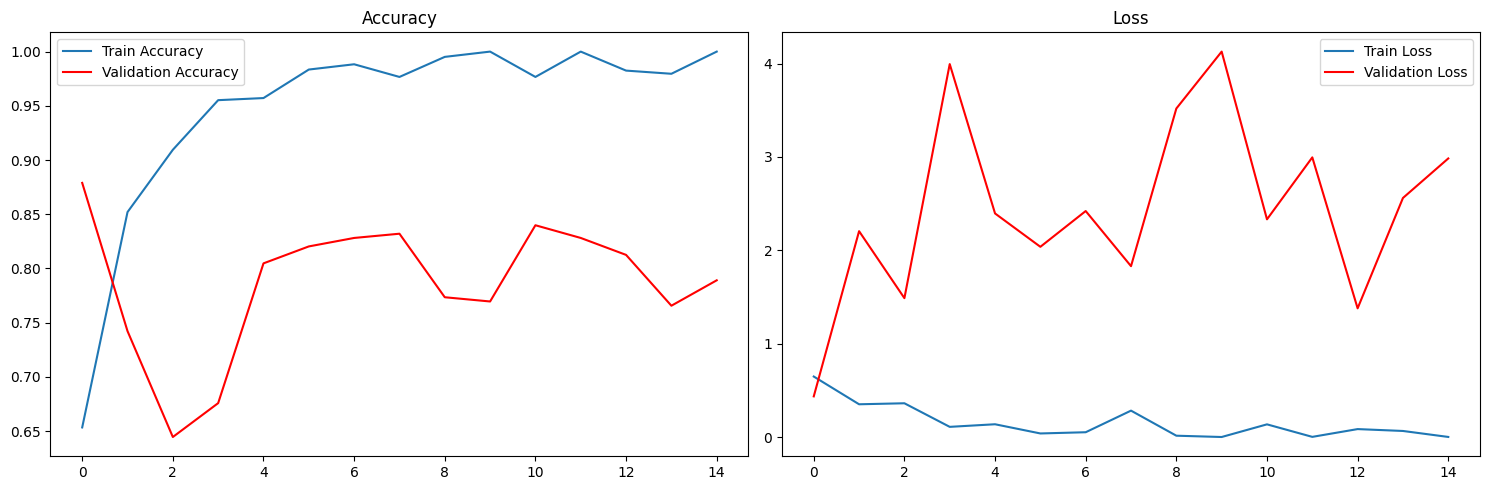

In [ ]:
# Vẽ biểu đồ đánh giá quá trình train trên 15 epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(acc, label='Train Accuracy')
axs[0].plot(val_acc, label='Validation Accuracy', color = 'red')
axs[0].set_title('Accuracy')
axs[0].legend()
axs[1].plot(loss, label='Train Loss')
axs[1].plot(val_loss, label='Validation Loss', color = 'red')
axs[1].set_title('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

Như mọi người thấy đấy, **đường màu xanh** đại diện cho dữ liệu trên **tập huấn luyện**, nhìn qua thì có vẻ rất **"yên bình"**, không có nhiều biến động. Nhưng khi nhìn sang **đường màu đỏ** đại diện cho **tập hiệu chỉnh (validation)**, ta mới thấy được sự **"sóng gió"** thật sự :v.

Điều này thể hiện rõ **khả năng hoạt động thực sự của mô hình** trên dữ liệu chưa từng biết đến hay nhìn thấy trước đó.

Bây giờ, mình sẽ in ra **kết quả đánh giá cuối cùng trên tập hiệu chỉnh (validation)** để mọi người có cái nhìn tổng quan hơn nha.

In [ ]:
# Kết quả đánh giá trên tập val
result = model.evaluate(validation_generator)
for i,m in enumerate(model.metrics_names):
  print(f"Kết quả đánh giá {m} trên tập val: {result[i]}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.7991 - loss: 2.8467
Kết quả đánh giá loss trên tập val: 2.9843480587005615
Kết quả đánh giá compile_metrics trên tập val: 0.7890625


Đây là kết quả ở lần chạy của mình ha, được gần 80%. Cũng khá là ổn nhỉ.

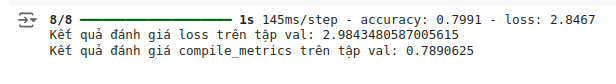

### Bây giờ tụi mình sẽ tiến hành kiểm tra kết quả dự đoán để xem thử rằng những trường hợp dự đoán sai trông như thế nào.

In [ ]:
# Chú ý ở đây ta có một chút thay đổi, vì lệnh ImageDataGenerator
# trước đó của ta chưa tắt shuffle nên thứ tự nhãn sẽ bị lệch,
# tuy rằng với evaluate mô hình vẫn có thể chạy đúng
# nhưng với predict thì mô hình lại hoạt động theo thứ tự khác
# do đó ta cần tắt shuffle đi.

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary',
    shuffle=False  # Tắt shuffle
)

Found 256 images belonging to 2 classes.


In [ ]:
# Chuyển sigmoid đầu ra thành nhãn nhị phân
y_pred = (model.predict(validation_generator) > 0.5).astype(int).flatten()

# Nhãn thực tế từ generator
y_true = validation_generator.classes

# Kiểm tra độ chính xác
accuracy = np.mean(y_pred == y_true)
print(f"Accuracy (manual): {accuracy * 100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
Accuracy (manual): 78.91%


Số ảnh bị sai:  54


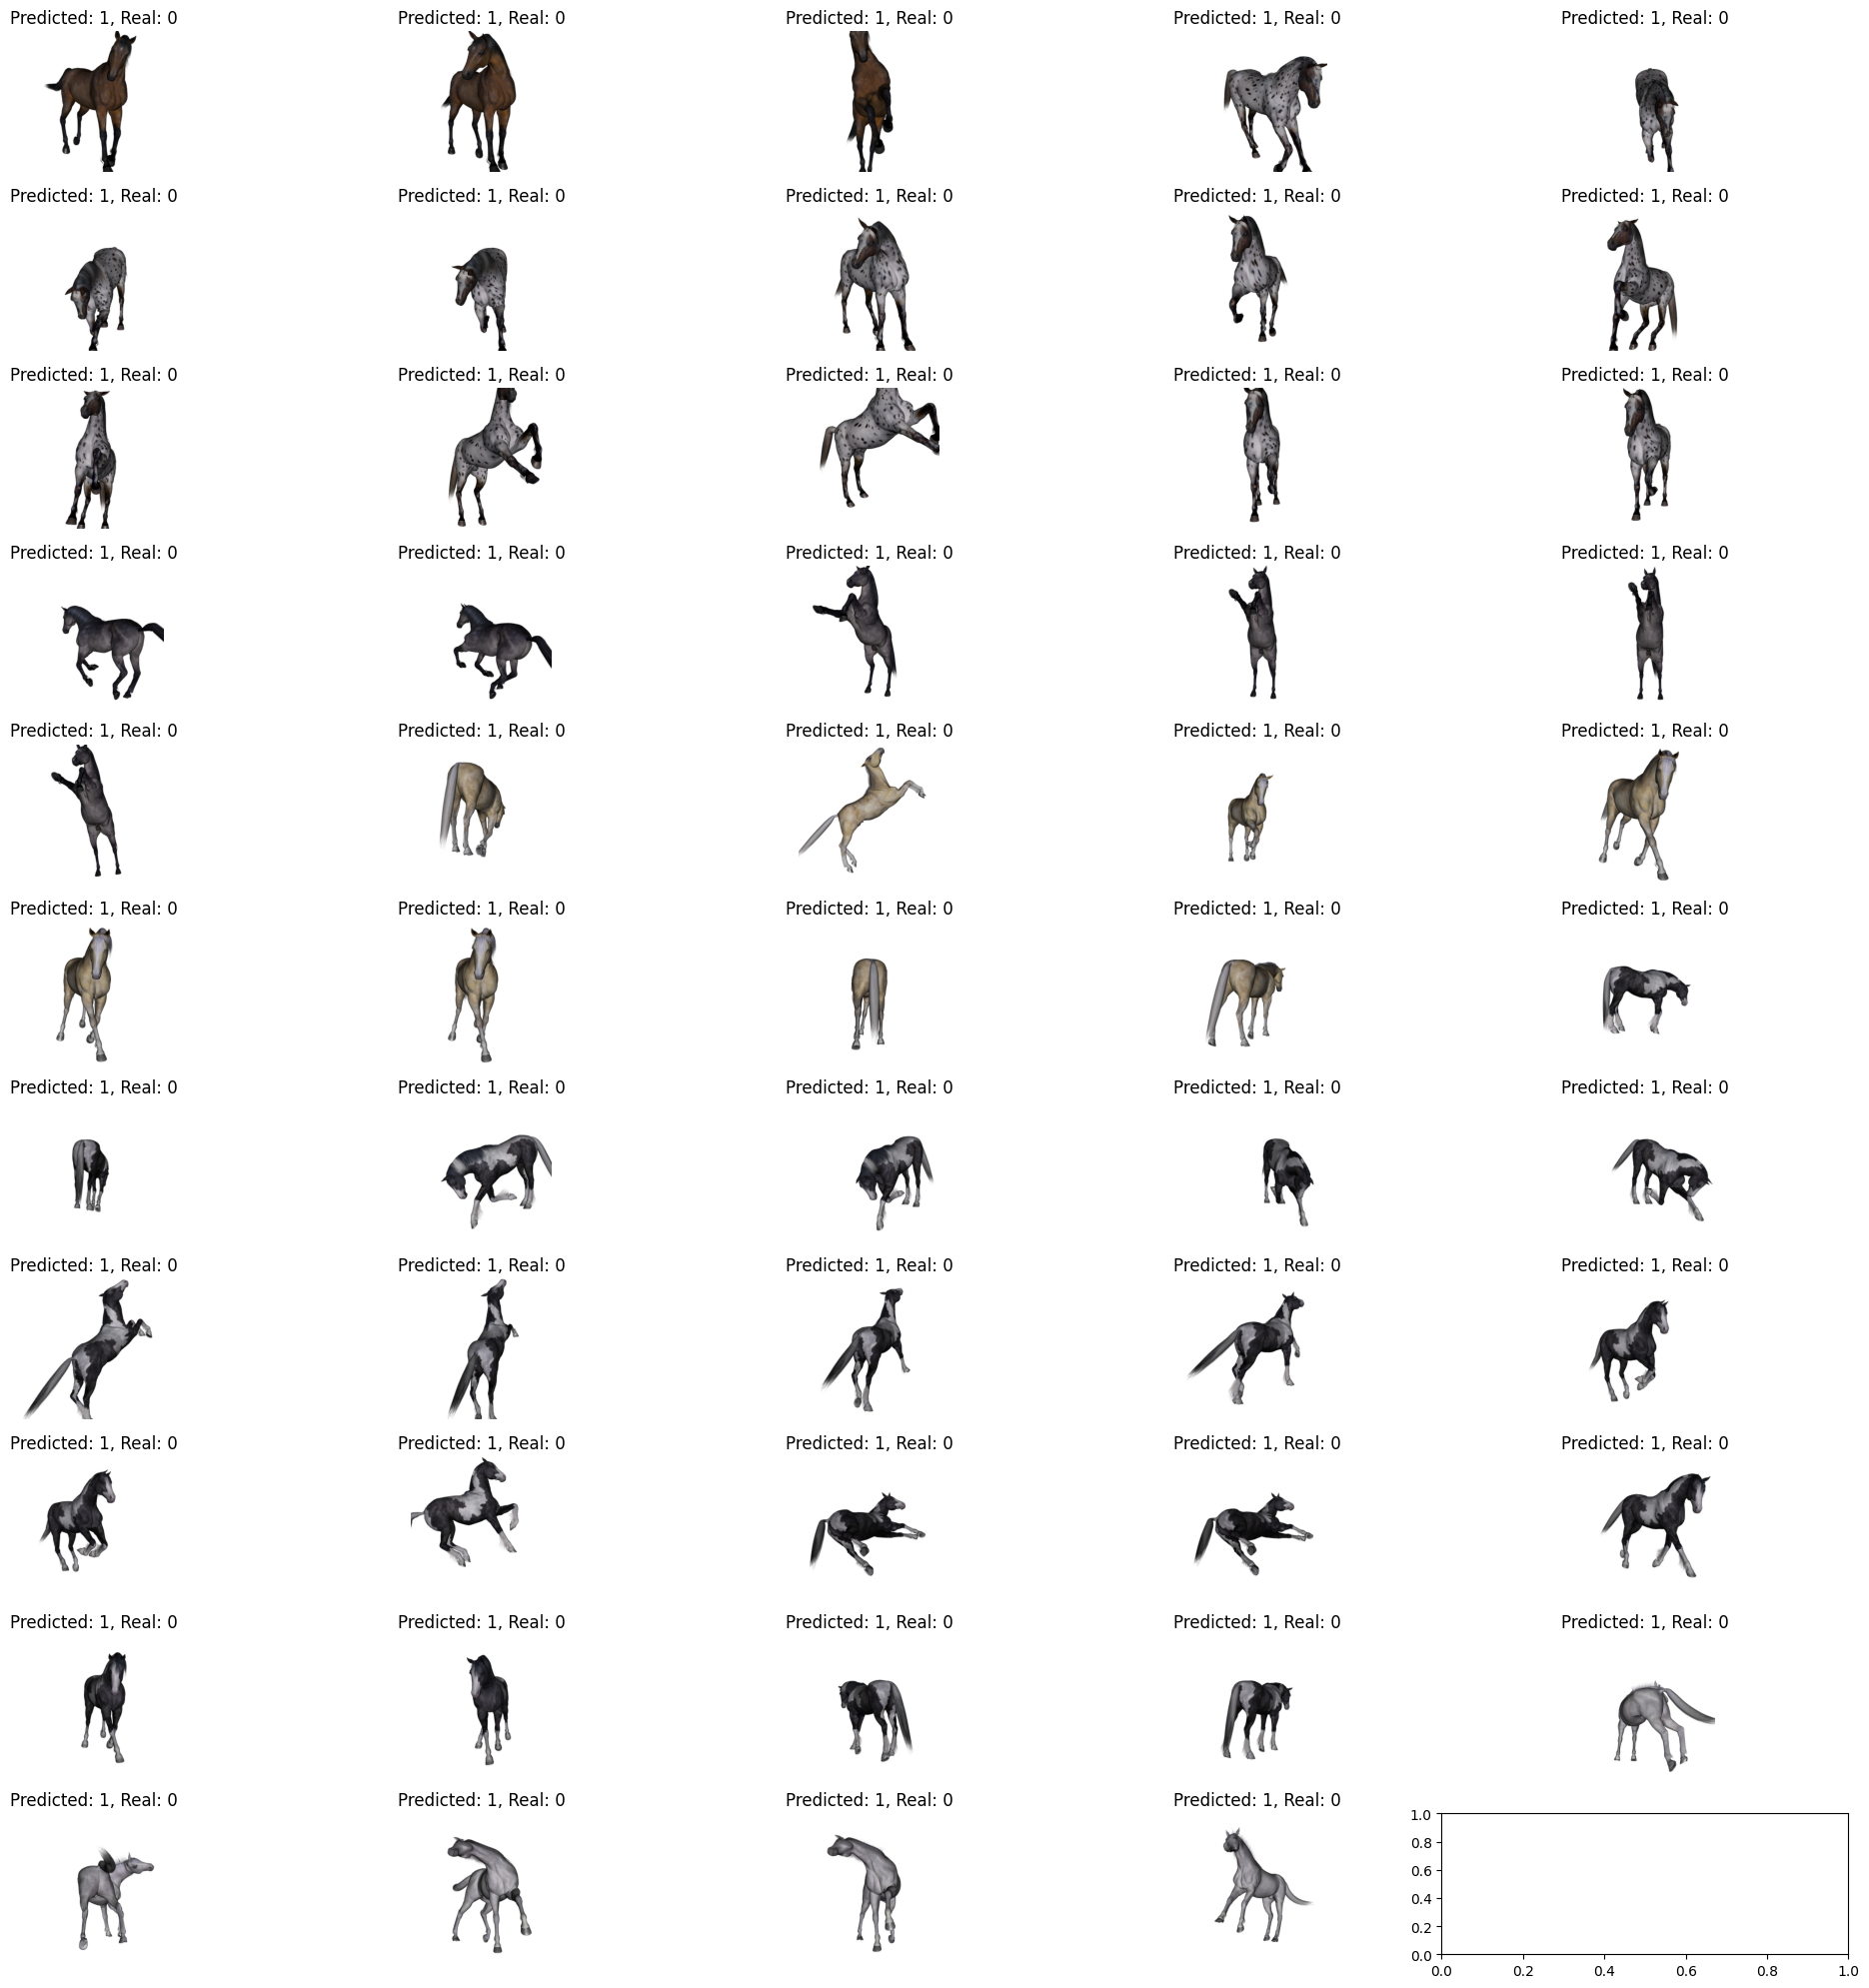

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy đường dẫn file và hình ảnh từ generator
filepaths = validation_generator.filepaths

# Tìm các ảnh bị dự đoán sai
incorrect_indices = np.where(y_pred != y_true)[0]  # Chỉ số ảnh bị sai
print("Số ảnh bị sai: ", len(incorrect_indices))

incorrect_filepaths = [filepaths[i] for i in incorrect_indices]

# Hiển thị ảnh bị dự đoán sai
n_cols = 5

# Tính số hàng của biểu đồ một cách linh động
if len(incorrect_indices) % n_cols == 0:
    n_rows = len(incorrect_indices) // n_cols
else:
    n_rows = len(incorrect_indices) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axs = axs.flatten()

for i, idx in enumerate(incorrect_indices):  # Hiển thị các ảnh sai
    # Đọc ảnh từ đường dẫn
    img = plt.imread(filepaths[idx])
    axs[i].imshow(img)
    axs[i].set_title(f"Predicted: {y_pred[idx]}, Real: {y_true[idx]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


### Đây là kết quả ở lần chạy của mình

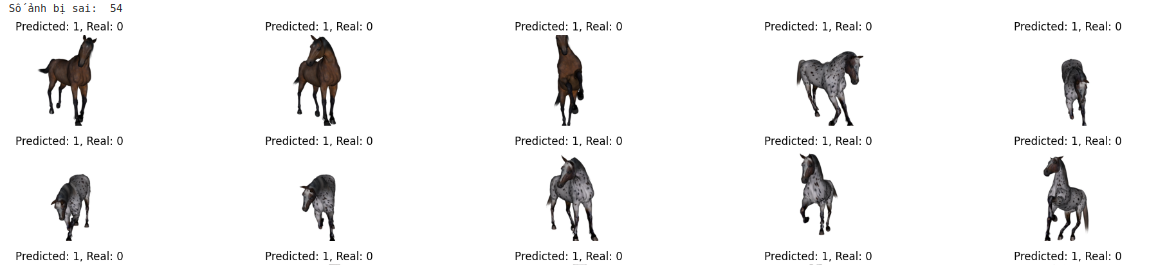

Mọi người có thể thấy sẽ có một vài tấm ảnh con ngựa có **dáng đứng đặc biệt**, chẳng hạn như hướng dọc đối diện về phía trước, có thể bị dự đoán sai vì nhìn giống tư thế đứng của con người. Tương tự, một vài tấm ảnh con người mặc áo quần có **màu sắc gần giống màu của ngựa** cũng có thể gây nhầm lẫn trong quá trình dự đoán.

> *Lưu ý*: Vì không phải lúc nào kết quả dự đoán của mọi người cũng giống hệt nhau (do quá trình huấn luyện có sự khác biệt nhỏ như dữ liệu ngẫu nhiên hay tham số ban đầu), nên nếu kết quả không giống hoàn toàn với mình mô tả, mọi người **đừng lo lắng quá nhé!**

### Bây giờ mình sẽ tiến hành dự đoán dựa trên các ảnh mà mình tải lên ha.

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

# Danh sách để lưu kết quả dự đoán
predicted_result = []

uploaded = files.upload()

for fn in uploaded.keys():
  # Lấy đường dẫn hình ảnh
  path = '/content/' + fn

  # Tiến hành lấy dữ liệu hình ảnh
  # Ảnh up lên có thể có nhiều kích thước khác nhau nên mình cần xác định lại về đúng kích thước đầu vào của mô hình (300 x 300).
  img = image.load_img(path, target_size = (300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  # Dự đoán hình ảnh
  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  pred_label = 0 if classes[0] < 0.5 else 1

  if pred_label == 1:
    print(f"Kết quả dự đoán {fn} là người.")
  else:
    print(f"Kết quả dự đoán {fn} là ngựa.")

  predicted_result.append([img, pred_label])


Saving OIP.jpeg to OIP (7).jpeg
Saving OIP (1).jpeg to OIP (1) (1).jpeg
Saving OIP (2).jpeg to OIP (2) (1).jpeg
Saving OIP (3).jpeg to OIP (3) (1).jpeg
Saving OIP (4).jpeg to OIP (4) (1).jpeg
Saving OIP (5).jpeg to OIP (5) (1).jpeg
Saving OIP (6).jpeg to OIP (6) (1).jpeg
Saving R.jpeg to R (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Kết quả dự đoán OIP (7).jpeg là người.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Kết quả dự đoán OIP (1) (1).jpeg là người.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Kết quả dự đoán OIP (2) (1).jpeg là người.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Kết quả dự đoán OIP (3) (1).jpeg là ngựa.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Kết quả dự đoán OIP (4) (1).jpeg là ngựa.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Kết quả dự đoán OIP (5) (1).jpeg là ngựa.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Kết quả dự đoán OIP (6) (1).jpeg là ngựa.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Kết quả dự đoán R (1).jpeg là ngựa.


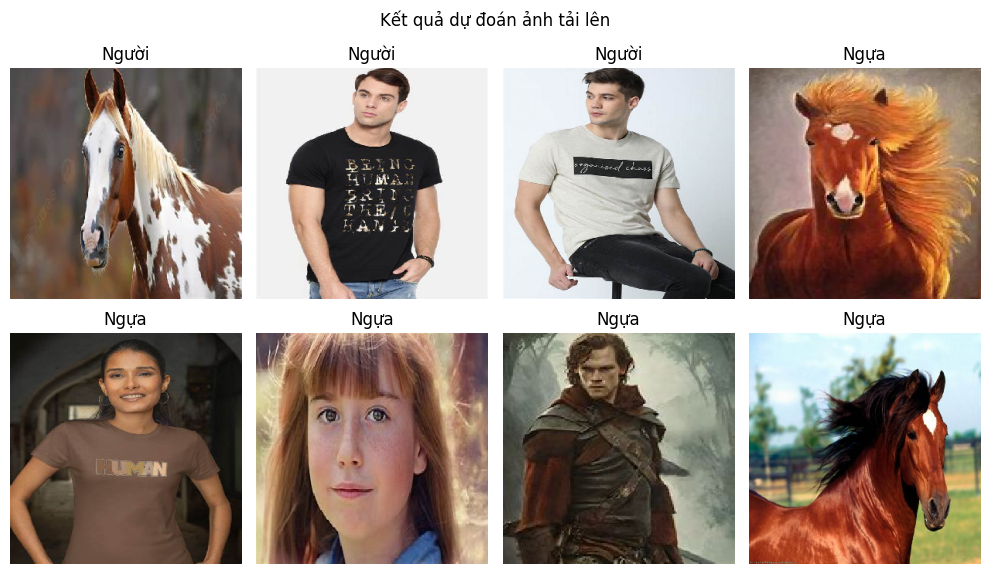

In [ ]:
# Trực quan hình ảnh và kết quả dự đoán
n_imgs = len(predicted_result)
n_cols = 4
# Tính số hàng một cách linh động
if n_imgs % n_cols == 0:
  n_rows = n_imgs // n_cols
else:
  n_rows = n_imgs // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize = (10, 6))
axs = axs.flatten()
for i in range(n_imgs):
  axs[i].imshow(predicted_result[i][0])
  pred_label = "Người" if predicted_result[i][1] == 1 else "Ngựa"
  axs[i].set_title(pred_label)
  axs[i].axis('off')

fig.suptitle("Kết quả dự đoán ảnh tải lên")

plt.tight_layout()
plt.show()

### Đây là kết quả của mình khi tải những hình ảnh đặc biệt lên nha.


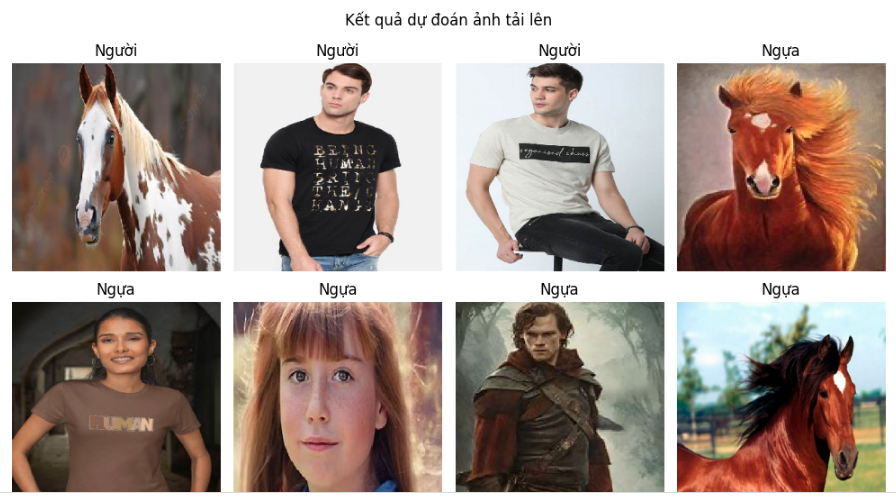

Bạn có thể thấy những tấm ảnh mình kiểm tra hầu hết đều bị **cắt một nửa** hoặc chỉ lấy một **phần bộ phận cơ thể**. Với những tấm ảnh về người, hầu hết đều bị dự đoán sai. Điều này có thể do:

1. **Dữ liệu trong quá trình huấn luyện thiếu sót các trường hợp đặc biệt**, chẳng hạn như ảnh chỉ chứa một phần cơ thể hoặc ảnh bị cắt góc.
2. **Số lượng mẫu chưa đủ nhiều**, dẫn đến mô hình chưa thể khái quát hóa tốt các trường hợp đa dạng.

Đây chính là lúc chúng ta cần đến một **phương pháp để gia tăng và làm giàu dữ liệu**. Phương pháp này sẽ giúp:
- Bao quát được các trường hợp thiếu sót đã gặp phải.
- Tăng tính đa dạng cho dữ liệu huấn luyện, giúp mô hình học được các đặc trưng tổng quát hơn.